## Objective : Based Titanic Dataset we have to build a model which will predict survival of pasanger 

### Step 1: Import Dependencies

In [1]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [14]:
sns.__version__

'0.13.0'

## Step 2: Load Dataset

In [2]:
#Read the training data and testing data
train_df = pd.read_excel('Titanic_Survival_train.xls', 
                         index_col=0, 
                         header=0)

test_df = pd.read_excel('Titanic_Survival_test.xls', 
                        index_col=0, 
                        header=0)

print(train_df.shape)
print(test_df.shape)

(891, 11)
(21, 11)


In [3]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:

# 1. Fucntion to create piechart 

def create_piechart(data, column):
    """
    Objective
    ---------- 
    Create Pichart for Categorical varaibles present in Pandas Dataframe
    
    parameters
    ----------
    data: this is pandas dataframe
    column: this is column name which is used to create plot
        
    returns
    ----------
    this will show piechart
    
    """
    labels = list(data[column].value_counts().to_dict().keys())
    sizes = list(data[column].value_counts().to_dict().values())
   
    plt.pie(sizes, 
            labels=labels, 
            autopct='%1.2f%%',
            shadow=False, 
            startangle=45)
    
    plt.axis('equal')  
    plt.title("Piechart - {}".format(column))
    plt.show()
    
# 1. Fucntion to check missing data 
    
def missing_data(df):
    """
    Objective
    ----------
    it shows the missing data in each column with 
    total missing values, percentage of missing value and
    its data type in descending order.
    
    parameters
    ----------
    df: pandas dataframe
        input data frame 
    
    returns
    ----------
    missing_data: output data frame(pandas dataframe)
    
    """
    
    total = df.isnull().sum().sort_values(ascending=False)
    
    percent = round((df.isnull().sum()/df.isnull().count()  * 100).sort_values(ascending=False),2)
    
    data_type = df.dtypes
    missing_data = pd.concat([total,percent,data_type],
                             axis=1,
                             keys=['Total','Percent','Data_Type']).sort_values("Total", 
                                                                               axis = 0,
                                                                               ascending = False)
    
    return missing_data


## Step 3: EDA

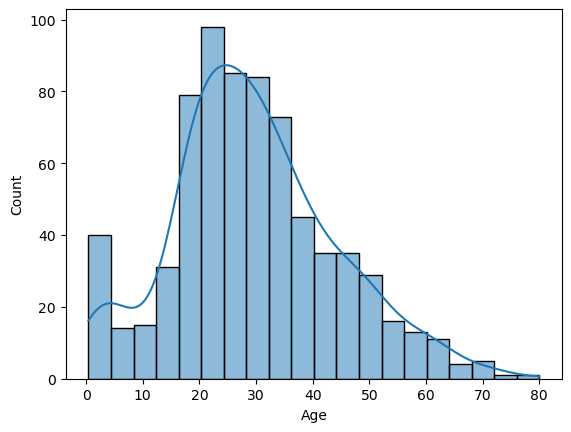

In [6]:
# Plot histogram
sns.histplot(data = train_df, x="Age", kde = True)
plt.show()

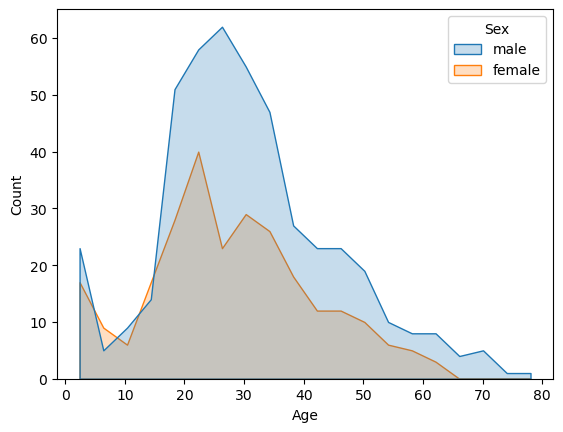

In [8]:
sns.histplot(data = train_df, 
             x="Age",
             kde = False,
             hue="Survived",
             element="poly")
plt.show()

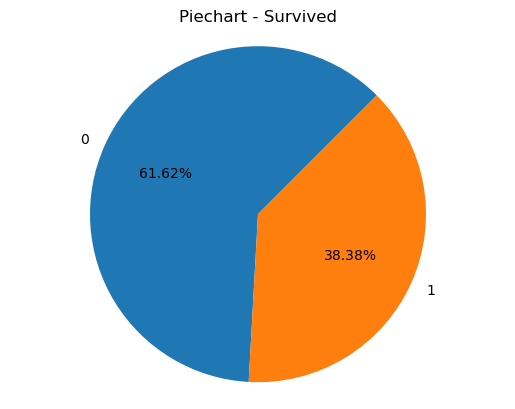

In [9]:
create_piechart(train_df, "Survived")

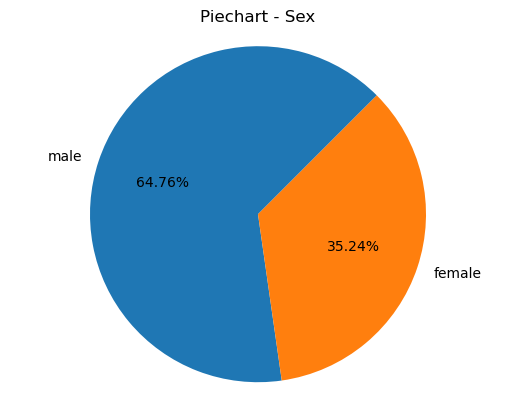

In [10]:
create_piechart(train_df, "Sex")

C:\Users\Dev\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


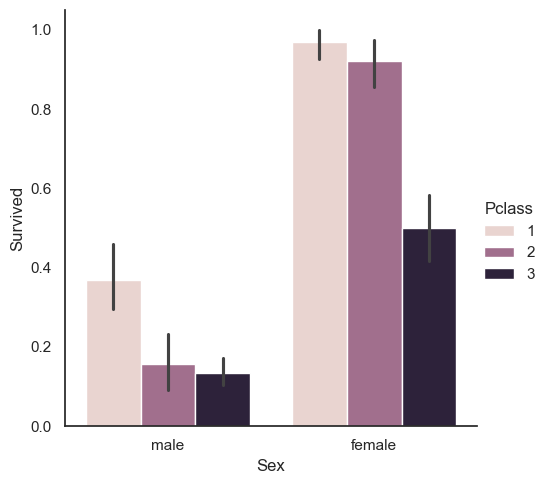

In [25]:
sns.catplot(data=train_df, 
           x="Sex",
           y="Survived",
           hue="Pclass",
           kind="bar")
plt.show()

C:\Users\Dev\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


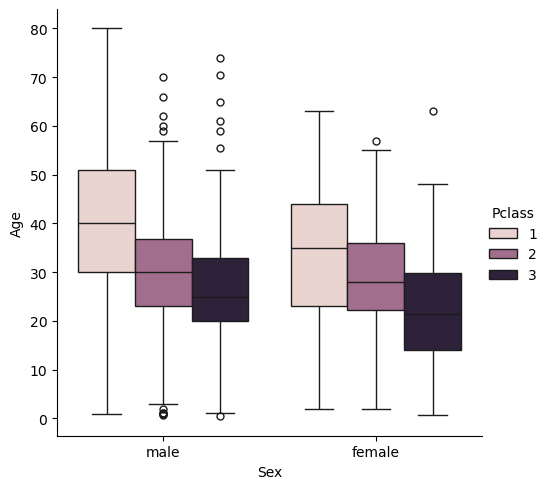

In [12]:
sns.catplot(data=train_df, 
           x="Sex",
           y="Age",
           hue="Pclass",
           kind="box")
plt.show()

C:\Users\Dev\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


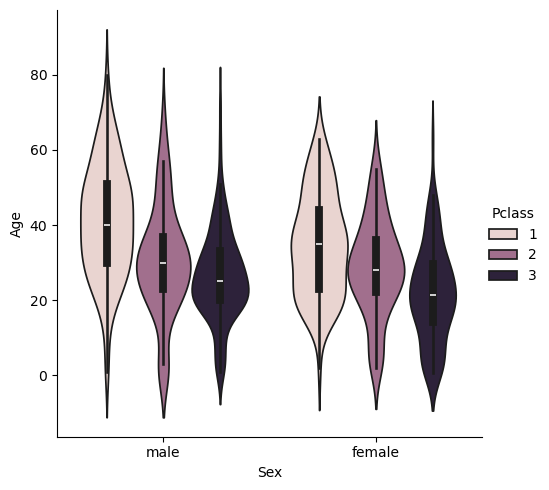

In [13]:
sns.catplot(data=train_df, 
           x="Sex",
           y="Age",
           hue="Pclass",
           kind="violin")
plt.show()

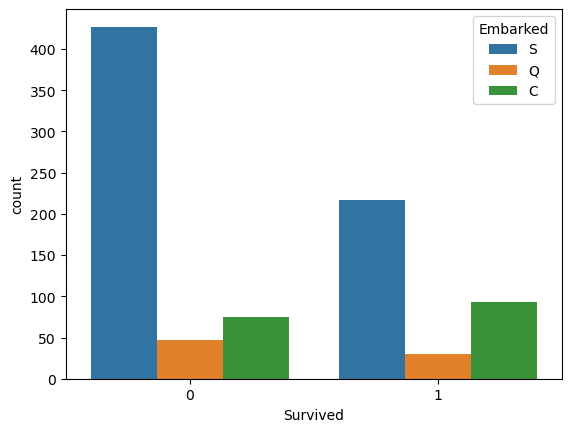

In [15]:
sns.countplot(x="Survived", hue="Embarked", data=train_df)
plt.show()

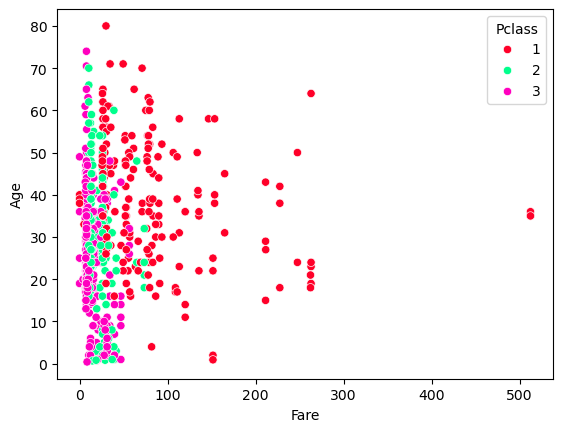

In [16]:
sns.scatterplot(data=train_df, 
                x="Fare", 
                y="Age", 
                hue="Pclass", 
                palette="gist_rainbow")
plt.show()

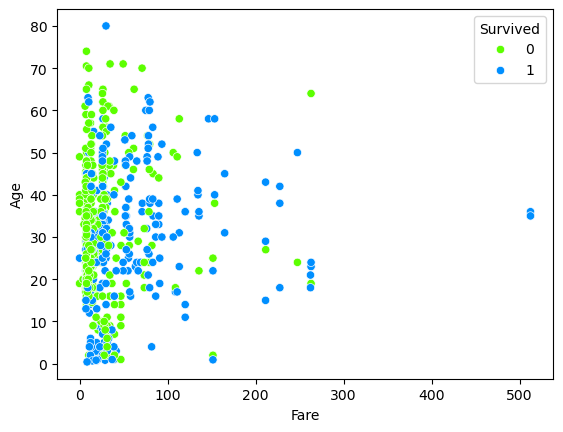

In [17]:
sns.scatterplot(data=train_df, 
                x="Fare", 
                y="Age", 
                hue="Survived", 
                palette="gist_rainbow")
plt.show()

## Step 4: Data Preprocessing 

In [30]:
train_df.head()

,Name,Pclass,Sex,Age,Survived
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",3,male,22.0,0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1
3,"Heikkinen, Miss. Laina",3,female,26.0,1
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1
5,"Allen, Mr. William Henry",3,male,35.0,0


In [26]:
#feature selection 
train_df = train_df[['Name','Pclass','Sex','Age','Survived']]
test_df = test_df[['Name','Pclass','Sex','Age','Survived']]

In [27]:
#finding the missing values
print(train_df.isnull().sum())
print()
print(test_df.isnull().sum())

Name          0
Pclass        0
Sex           0
Age         177
Survived      0
dtype: int64

Name        0
Pclass      0
Sex         0
Age         2
Survived    0
dtype: int64


In [28]:
#imputing numerical missing data with mean value
train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)

#imputing numerical missing data with mean value
test_df["Age"].fillna(test_df["Age"].mean(),inplace=True)

C:\Users\Dev\AppData\Local\Temp\ipykernel_48240\3271324331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)


In [29]:
#finding the missing values
print(train_df.isnull().sum())
print()
print(test_df.isnull().sum())

Name        0
Pclass      0
Sex         0
Age         0
Survived    0
dtype: int64

Name        0
Pclass      0
Sex         0
Age         0
Survived    0
dtype: int64


In [31]:
train_df["Sex"]=train_df["Sex"].map({"male":0,"female":1})
test_df["Sex"]=test_df["Sex"].map({"male":0,"female":1})

C:\Users\Dev\AppData\Local\Temp\ipykernel_48240\3188929605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Sex"]=train_df["Sex"].map({"male":0,"female":1})


In [32]:
train_df.head()

,Name,Pclass,Sex,Age,Survived
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",3,0,22.0,0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,38.0,1
3,"Heikkinen, Miss. Laina",3,1,26.0,1
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,35.0,1
5,"Allen, Mr. William Henry",3,0,35.0,0


In [ ]:
#transforming categorical data to numerical

# from sklearn import preprocessing

# colname=['Sex']

# le=preprocessing.LabelEncoder()

# for x in colname:
#     training_data[x]=le.fit_transform(training_data[x])
#     testing_data[x]=le.fit_transform(testing_data[x])
    
# training_data['Sex']=training_data['Sex'].map({"female":0, "male":1})
# testing_data['Sex']=testing_data['Sex'].map({"female":0, "male":1})

In [ ]:
# training_data.drop("sex1", inplace=True, axis=1)

In [ ]:
# testing_data.head()

In [33]:
train_df.tail()

,Name,Pclass,Sex,Age,Survived
PassengerId,,,,,
887,"Montvila, Rev. Juozas",2,0,27.000000,0
888,"Graham, Miss. Margaret Edith",1,1,19.000000,1
889,"Johnston, Miss. Catherine Helen ""Carrie""",3,1,29.699118,0
890,"Behr, Mr. Karl Howell",1,0,26.000000,1
891,"Dooley, Mr. Patrick",3,0,32.000000,0


In [34]:
test_df.head(23)

,Name,Pclass,Sex,Age,Survived
PassengerId,,,,,
871,"Balkic, Mr. Cerin",3,0,26.000000,0
872,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,1,47.000000,1
873,"Carlsson, Mr. Frans Olof",1,0,33.000000,0
874,"Vander Cruyssen, Mr. Victor",3,0,47.000000,0
875,"Abelson, Mrs. Samuel (Hannah Wizosky)",2,1,28.000000,1
876,"Najib, Miss. Adele Kiamie ""Jane""",3,1,15.000000,1
877,"Gustafsson, Mr. Alfred Ossian",3,0,20.000000,0
878,"Petroff, Mr. Nedelio",3,0,19.000000,0
879,"Laleff, Mr. Kristo",3,0,29.842105,0


In [ ]:
train_df.tail(23)

In [35]:
X_train=train_df.values[:870,  1:-1] # variables from pclass to age [ observation ,  columns]
y_train=train_df.values[:870,   -1] # passangersIds from 1 to 870 
y_train=y_train.astype(int)

X_test=test_df.values[:, 1:-1]
y_test=test_df.values[:, -1]
y_test=y_test.astype(int)

In [36]:
print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

X_train :  (870, 3)
y_train :  (870,)
X_test :  (21, 3)
y_test :  (21,)


In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# mean = 0 and std = 1
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)
# while working on separate train and test data, fit the 
# scaler oject only uplon the train data
# and use the same scaler object to transform both the 
# train as well as the test data.

In [38]:
X_train_scale

array([[1.        , 0.        , 0.27117366],
       [0.        , 1.        , 0.4722292 ],
       [1.        , 1.        , 0.32143755],
       ...,
       [0.        , 0.        , 0.3842674 ],
       [1.        , 0.        , 0.36792055],
       [1.        , 0.        , 0.04498618]])

In [39]:
X_test_scale

array([[1.        , 0.        , 0.32143755],
       [0.        , 1.        , 0.58532295],
       [0.        , 0.        , 0.40939935],
       [1.        , 0.        , 0.58532295],
       [0.5       , 1.        , 0.34656949],
       [1.        , 1.        , 0.18321186],
       [1.        , 0.        , 0.24604172],
       [1.        , 0.        , 0.23347575],
       [1.        , 0.        , 0.36971733],
       [0.        , 1.        , 0.69841669],
       [0.5       , 1.        , 0.30887158],
       [1.        , 0.        , 0.40939935],
       [1.        , 1.        , 0.27117366],
       [0.5       , 0.        , 0.34656949],
       [1.        , 0.        , 0.30887158],
       [1.        , 1.        , 0.48479517],
       [0.5       , 0.        , 0.33400352],
       [0.        , 1.        , 0.23347575],
       [1.        , 1.        , 0.36971733],
       [0.        , 0.        , 0.32143755],
       [1.        , 0.        , 0.39683338]])

## Step 5 : Model Building 

### 1. KNN 

In [49]:
#predicting using the KNeighbors_Classifier
model_KNN = KNeighborsClassifier(n_neighbors=7, metric="euclidean")

#fit the model on the data and predict the values
model_KNN.fit(X_train_scale,y_train)

# import sklearn (run this code to get all distance metrics )
# sklearn.neighbors.VALID_METRICS['brute']

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

### Test Data Eval

In [50]:
#predict using the model
y_pred= model_KNN.predict(X_test_scale)

print("---------Confusion Matrix------------")
print(confusion_matrix(y_test, y_pred))
print()
print("---------Accuracy Score------------")
print(accuracy_score(y_test,y_pred))
print()
print("---------Classification Report------------")
print(classification_report(y_test,y_pred))

---------Confusion Matrix------------
[[11  3]
 [ 0  7]]

---------Accuracy Score------------
0.8571428571428571

---------Classification Report------------
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.70      1.00      0.82         7

    accuracy                           0.86        21
   macro avg       0.85      0.89      0.85        21
weighted avg       0.90      0.86      0.86        21



### Train Data Eval

In [51]:
#predict using the model
y_pred= model_KNN.predict(X_train_scale)

print("---------Confusion Matrix------------")
print(confusion_matrix(y_train, y_pred))
print()
print("---------Accuracy Score------------")
print(accuracy_score(y_train,y_pred))
print()
print("---------Classification Report------------")
print(classification_report(y_train,y_pred))

---------Confusion Matrix------------
[[481  54]
 [ 87 248]]

---------Accuracy Score------------
0.8379310344827586

---------Classification Report------------
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       535
           1       0.82      0.74      0.78       335

    accuracy                           0.84       870
   macro avg       0.83      0.82      0.83       870
weighted avg       0.84      0.84      0.84       870



### 2. Using Logistic regression 

In [43]:
#create a model
classifier=LogisticRegression()

#fitting training data to the model
classifier.fit(X_train_scale, y_train)
# print(list(zip(y_test,y_pred)))

LogisticRegression()

### Test Data Eval

In [44]:
#predict using the model
y_pred=classifier.predict(X_test_scale)

print("---------Confusion Matrix------------")
print(confusion_matrix(y_test, y_pred))
print()
print("---------Accuracy Score------------")
print(accuracy_score(y_test,y_pred))
print()
print("---------Classification Report------------")
print(classification_report(y_test,y_pred))

---------Confusion Matrix------------
[[11  3]
 [ 1  6]]

---------Accuracy Score------------
0.8095238095238095

---------Classification Report------------
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.67      0.86      0.75         7

    accuracy                           0.81        21
   macro avg       0.79      0.82      0.80        21
weighted avg       0.83      0.81      0.81        21



### Training Data Eval 

In [45]:
#predict using the model
y_pred=classifier.predict(X_train_scale)

print("---------Confusion Matrix------------")
print(confusion_matrix(y_train, y_pred))
print()
print("---------Accuracy Score------------")
print(accuracy_score(y_train,y_pred))
print()
print("---------Classification Report------------")
print(classification_report(y_train,y_pred))

---------Confusion Matrix------------
[[458  77]
 [104 231]]

---------Accuracy Score------------
0.7919540229885057

---------Classification Report------------
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       535
           1       0.75      0.69      0.72       335

    accuracy                           0.79       870
   macro avg       0.78      0.77      0.78       870
weighted avg       0.79      0.79      0.79       870



### Try KNN with Diff Numbers

In [52]:

acc_dict = dict()

for K in range(1, 101):
    
    # create object with k value
    model_KNN = KNeighborsClassifier(K, metric='euclidean')
    
    # model fit 
    model_KNN.fit(X_train_scale, y_train) 
    
    # model prediction
    y_pred = model_KNN.predict(X_test_scale)
    
    acc_score= round(accuracy_score(y_test, y_pred),2 )
    
    # print accuracy score
    print("Accuracy is: {} for K-Value: {}".format(acc_score,K))
    acc_dict[K] = acc_score

Accuracy is: 0.81 for K-Value: 1
Accuracy is: 0.76 for K-Value: 2
Accuracy is: 0.76 for K-Value: 3
Accuracy is: 0.76 for K-Value: 4
Accuracy is: 0.81 for K-Value: 5
Accuracy is: 0.86 for K-Value: 6
Accuracy is: 0.86 for K-Value: 7
Accuracy is: 0.86 for K-Value: 8
Accuracy is: 0.86 for K-Value: 9
Accuracy is: 0.86 for K-Value: 10
Accuracy is: 0.86 for K-Value: 11
Accuracy is: 0.9 for K-Value: 12
Accuracy is: 0.9 for K-Value: 13
Accuracy is: 0.86 for K-Value: 14
Accuracy is: 0.86 for K-Value: 15
Accuracy is: 0.81 for K-Value: 16
Accuracy is: 0.86 for K-Value: 17
Accuracy is: 0.81 for K-Value: 18
Accuracy is: 0.81 for K-Value: 19
Accuracy is: 0.81 for K-Value: 20
Accuracy is: 0.81 for K-Value: 21
Accuracy is: 0.9 for K-Value: 22
Accuracy is: 0.9 for K-Value: 23
Accuracy is: 0.86 for K-Value: 24
Accuracy is: 0.86 for K-Value: 25
Accuracy is: 0.86 for K-Value: 26
Accuracy is: 0.81 for K-Value: 27
Accuracy is: 0.86 for K-Value: 28
Accuracy is: 0.86 for K-Value: 29
Accuracy is: 0.86 for K-Val

In [53]:
for k in acc_dict:
    if acc_dict[k] == max(acc_dict.values()):
        print(k,":", acc_dict[k])

12 : 0.9
13 : 0.9
22 : 0.9
23 : 0.9


In [54]:
model = KNeighborsClassifier(n_neighbors=23, metric="euclidean", n_jobs=-1)

# model fit 
model.fit(X_train_scale, y_train) 

# model prediction
y_pred = model.predict(X_test_scale)


In [55]:
print("---------Confusion Matrix------------")
print(confusion_matrix(y_test, y_pred))
print()
print("---------Accuracy Score------------")
print(accuracy_score(y_test,y_pred))
print()
print("---------Classification Report------------")
print(classification_report(y_test,y_pred))

---------Confusion Matrix------------
[[13  1]
 [ 1  6]]

---------Accuracy Score------------
0.9047619047619048

---------Classification Report------------
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.86      0.86      0.86         7

    accuracy                           0.90        21
   macro avg       0.89      0.89      0.89        21
weighted avg       0.90      0.90      0.90        21



# KNN Regression 

In [56]:
df = pd.read_csv("Advertising.csv", index_col=0)

In [57]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [58]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [59]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [61]:
X  = df[['TV', 'radio', 'newspaper']]
y = df['sales']

In [62]:
from sklearn.model_selection import train_test_split
#Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=10)  

In [68]:
from sklearn import linear_model
from sklearn import tree
from sklearn import neighbors

In [69]:
dir(neighbors)

['BallTree',
 'KDTree',
 'KNeighborsClassifier',
 'KNeighborsRegressor',
 'KNeighborsTransformer',
 'KernelDensity',
 'LocalOutlierFactor',
 'NearestCentroid',
 'NearestNeighbors',
 'NeighborhoodComponentsAnalysis',
 'RadiusNeighborsClassifier',
 'RadiusNeighborsRegressor',
 'RadiusNeighborsTransformer',
 'VALID_METRICS',
 'VALID_METRICS_SPARSE',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_ball_tree',
 '_base',
 '_classification',
 '_graph',
 '_kd_tree',
 '_kde',
 '_lof',
 '_nca',
 '_nearest_centroid',
 '_partition_nodes',
 '_quad_tree',
 '_regression',
 '_unsupervised',
 'kneighbors_graph',
 'radius_neighbors_graph',
 'sort_graph_by_row_values']

In [70]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsRegressor

model_KNN = KNeighborsRegressor(n_neighbors=3, metric="euclidean")

#fit the model on the data and predict the values
model_KNN.fit(X_train,y_train)
y_pred=model_KNN.predict(X_test)

In [72]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("R2: ",r2)
print("RMSE: ", rmse)

R2:  0.925958613863326
RMSE:  1.6668055497690009


In [73]:
min(y_test), max(y_test)

(1.6, 27.0)

In [74]:
acc_dict = dict()
for K in range(2, 31):
    
    # create object with k value
    model_KNN = KNeighborsRegressor(n_neighbors=K, metric="euclidean")
    
    # model fit 
    model_KNN.fit(X_train, y_train)  
    # model prediction
    y_pred = model_KNN.predict(X_test)
    r2 = r2_score(y_test,y_pred)   
    # print accuracy score
    print("Accuracy is: {} for K-Value: {}".format(r2,K))
    acc_dict[K] =r2

Accuracy is: 0.9182264031854402 for K-Value: 2
Accuracy is: 0.925958613863326 for K-Value: 3
Accuracy is: 0.932788657210048 for K-Value: 4
Accuracy is: 0.9149539491202795 for K-Value: 5
Accuracy is: 0.8929665815850817 for K-Value: 6
Accuracy is: 0.8744848671701098 for K-Value: 7
Accuracy is: 0.8654478098543175 for K-Value: 8
Accuracy is: 0.8492939672848692 for K-Value: 9
Accuracy is: 0.8402713283054284 for K-Value: 10
Accuracy is: 0.8371675782423147 for K-Value: 11
Accuracy is: 0.8373829505130865 for K-Value: 12
Accuracy is: 0.8276548833014651 for K-Value: 13
Accuracy is: 0.8283131539137829 for K-Value: 14
Accuracy is: 0.8161422263836416 for K-Value: 15
Accuracy is: 0.8004112554208694 for K-Value: 16
Accuracy is: 0.7942012190658417 for K-Value: 17
Accuracy is: 0.7802634154775825 for K-Value: 18
Accuracy is: 0.7676471516517576 for K-Value: 19
Accuracy is: 0.7573316851506093 for K-Value: 20
Accuracy is: 0.7503499480255902 for K-Value: 21
Accuracy is: 0.7463504736257043 for K-Value: 22
Ac

In [75]:
for k in acc_dict:
    if acc_dict[k] == max(acc_dict.values()):
        print(k,":", acc_dict[k])

4 : 0.932788657210048


In [77]:
# predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsRegressor

model_KNN = KNeighborsRegressor(n_neighbors=4, metric="euclidean")

#fit the model on the data and predict the values
model_KNN.fit(X_train,y_train)
y_pred=model_KNN.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("R2: ",r2)
print("RMSE: ", rmse)

R2:  0.932788657210048
RMSE:  1.5880674838725635
